In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [59]:
titanic = pd.read_csv(r"C:\Users\Hp EliteBook 840 G2\Downloads\titanic_train.csv")

In [47]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
titanic.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [16]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
titanic.columns=[element.lower()for element in titanic.columns]

In [21]:
titanic.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [72]:
male= titanic.query("Age.notnull() and Sex== 'male'")
mean_age_m = float(round(male.Age.mean()))

In [ ]:
female= titanic.query("Age.notnull() and Sex== 'female'")
mean_age = float(round(female.Age.mean()))

In [68]:
titanic['Age']= titanic.apply(lambda row: mean_age_m
                              if row['Sex']== 'male' and np.isnan(row['Age'])
                              else row['Age'], axis = 1)

In [73]:
titanic['Age']= titanic.apply(lambda row: mean_age
                              if row['Sex']== 'female' and np.isnan(row['Age'])
                              else row['Age'], axis = 1)

In [78]:
titanic.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [83]:
titanic.dropna(subset="Embarked", axis=0, inplace = True)

In [87]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [95]:
titanic['Age'] = titanic['Age'].astype(int)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C


In [96]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    int32  
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int32(1), int64(5), object(5)
memory usage: 86.8+ KB


In [98]:
columns = ["Age", "SibSp", "Parch", "Fare"]
titanic[columns].describe()

,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000
mean,29.745782,0.524184,0.382452,32.096681
std,12.984075,1.103705,0.806761,49.697504
min,1.000000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.895800
50%,30.000000,0.000000,0.000000,14.454200
75%,35.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


In [97]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.745782,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.984075,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [103]:
#No. of Survived and Deceased

titanic["Survived"].value_counts()

0    549
1    340
Name: Survived, dtype: int64

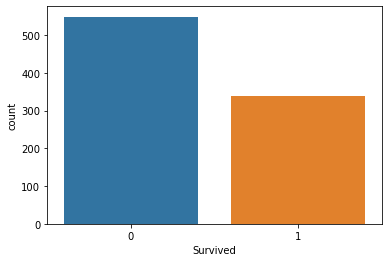

In [108]:
sns.countplot(x = "Survived", data = titanic)
plt.show()

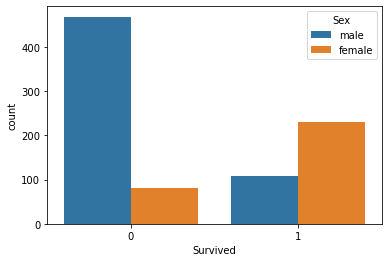

In [110]:
sns.countplot(x = "Survived", hue = "Sex",  data = titanic)
plt.show()

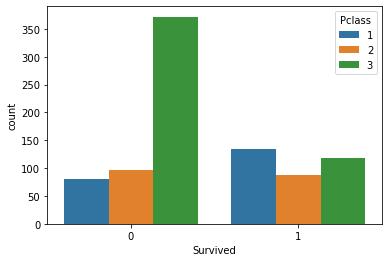

In [111]:
sns.countplot(x = "Survived", hue = "Pclass",  data = titanic)
plt.show()

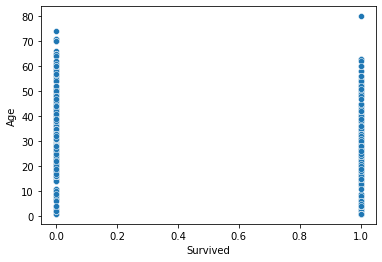

In [114]:
sns.scatterplot(x = "Survived", y = "Age",  data = titanic)
plt.show()

In [118]:
from sklearn.linear_model import LinearRegression

In [120]:
sex_dummies = pd.get_dummies(titanic["Sex"])
sex_dummies

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [121]:
Pclass_dummies = pd.get_dummies(titanic["Pclass"])
Pclass_dummies

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
886,0,1,0
887,1,0,0
888,0,0,1
889,1,0,0


In [133]:
data = pd.concat([titanic,Pclass_dummies,sex_dummies], axis = 1)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,1,2,3,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,1,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,NaN,S,0,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S,1,0,0,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28,1,2,W./C. 6607,23.4500,NaN,S,0,0,1,1,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C,1,0,0,0,1


In [141]:
data.drop(columns = ["PassengerId", "Pclass", "Cabin", "Name", "Sex","Ticket", "Fare", "Embarked"], axis = 1, inplace = True)
data

KeyError: "['PassengerId', 'Pclass', 'Cabin', 'Name', 'Sex', 'Ticket', 'Fare'] not found in axis"

In [143]:
data

,Survived,Age,SibSp,Parch,Embarked,1,2,3,female,male
0,0,22,1,0,S,0,0,1,0,1
1,1,38,1,0,C,1,0,0,1,0
2,1,26,0,0,S,0,0,1,1,0
3,1,35,1,0,S,1,0,0,1,0
4,0,35,0,0,S,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,27,0,0,S,0,1,0,0,1
887,1,19,0,0,S,1,0,0,1,0
888,0,28,1,2,S,0,0,1,1,0
889,1,26,0,0,C,1,0,0,0,1


In [144]:
data.drop(columns = ["Embarked"], axis = 1, inplace = True)
data

,Survived,Age,SibSp,Parch,1,2,3,female,male
0,0,22,1,0,0,0,1,0,1
1,1,38,1,0,1,0,0,1,0
2,1,26,0,0,0,0,1,1,0
3,1,35,1,0,1,0,0,1,0
4,0,35,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,27,0,0,0,1,0,0,1
887,1,19,0,0,1,0,0,1,0
888,0,28,1,2,0,0,1,1,0
889,1,26,0,0,1,0,0,0,1


In [146]:
data.rename(columns = {1:"Pclass_1",2:"Pclass_2",3:"Pclass_3"}, inplace = True)
data

,Survived,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,female,male
0,0,22,1,0,0,0,1,0,1
1,1,38,1,0,1,0,0,1,0
2,1,26,0,0,0,0,1,1,0
3,1,35,1,0,1,0,0,1,0
4,0,35,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,27,0,0,0,1,0,0,1
887,1,19,0,0,1,0,0,1,0
888,0,28,1,2,0,0,1,1,0
889,1,26,0,0,1,0,0,0,1
